In [210]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [157]:
df = pd.read_csv('Datasets/household_power_consumption.csv')
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2016,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16/12/2016,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16/12/2016,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16/12/2016,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16/12/2016,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0
...,...,...,...,...,...,...,...,...,...
250479,8/6/2017,16:03:00,0.326,0.098,240.34,1.4,0,2,0.0
250480,8/6/2017,16:04:00,0.306,0.094,240.11,1.4,0,1,0.0
250481,8/6/2017,16:05:00,0.344,0.106,239.82,1.6,0,1,0.0
250482,8/6/2017,16:06:00,0.416,0.226,240.17,2,0,1,0.0


## Exploratory Data Analysis

In [158]:
#selecting 30000 sample data
df = df.sample(30000)
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
164525,9/4/2017,23:29:00,0.482,0.348,241.69,2.4,0,2,0.0
67797,1/2/2017,19:21:00,2.834,0,236.32,12,0,0,17.0
137223,22/3/2017,0:27:00,1.57,0.312,241.67,6.6,0,1,18.0
189838,27/4/2017,13:22:00,0.306,0,235.77,1.2,0,0,0.0
50682,20/1/2017,22:06:00,1.118,0,239.84,4.6,0,1,0.0
...,...,...,...,...,...,...,...,...,...
25239,3/1/2017,6:03:00,0.342,0.196,248.08,1.6,0,0,0.0
131118,17/3/2017,18:42:00,1.748,0.08,236.28,7.4,0,0,17.0
93573,19/2/2017,16:57:00,0.252,0,244.3,1,0,0,0.0
33443,8/1/2017,22:47:00,1,0.13,243.25,4,0,0,0.0


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 164525 to 63942
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   30000 non-null  object 
 1   Time                   30000 non-null  object 
 2   Global_active_power    30000 non-null  object 
 3   Global_reactive_power  30000 non-null  object 
 4   Voltage                30000 non-null  object 
 5   Global_intensity       30000 non-null  object 
 6   Sub_metering_1         30000 non-null  object 
 7   Sub_metering_2         30000 non-null  object 
 8   Sub_metering_3         29593 non-null  float64
dtypes: float64(1), object(8)
memory usage: 2.3+ MB


In [160]:
df.describe()

,Sub_metering_3
count,29593.000000
mean,6.167709
std,8.303895
min,0.000000
25%,0.000000
50%,0.000000
75%,17.000000
max,19.000000


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 164525 to 63942
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   30000 non-null  object 
 1   Time                   30000 non-null  object 
 2   Global_active_power    30000 non-null  object 
 3   Global_reactive_power  30000 non-null  object 
 4   Voltage                30000 non-null  object 
 5   Global_intensity       30000 non-null  object 
 6   Sub_metering_1         30000 non-null  object 
 7   Sub_metering_2         30000 non-null  object 
 8   Sub_metering_3         29593 non-null  float64
dtypes: float64(1), object(8)
memory usage: 2.3+ MB


### Feature Information 

- **Date**: Date in format **dd/mm/yyyy**
- **Time**: time in format **hh:mm:ss**
- **Global_active_power**: household global minute-averaged active power (in **kilowatt**)
- **Global_reactive_power**: household global minute-averaged reactive power (in **kilowatt**)
- **Voltage**: minute-averaged voltage (in **volt**)
- **Global_intensity**: household global minute-averaged current intensity (in **ampere**)
- **Sub_metering_1**, **Sub_metering_1**, and **Sub_metering_1** are the **meter readings**

### Separating date, month and year

In [162]:
df['Date'] 

164525     9/4/2017
67797      1/2/2017
137223    22/3/2017
189838    27/4/2017
50682     20/1/2017
            ...    
25239      3/1/2017
131118    17/3/2017
93573     19/2/2017
33443      8/1/2017
63942     30/1/2017
Name: Date, Length: 30000, dtype: object

In [163]:
df['Date']  = pd.to_datetime(df['Date'])
df['Date'] 

164525   2017-09-04
67797    2017-01-02
137223   2017-03-22
189838   2017-04-27
50682    2017-01-20
            ...    
25239    2017-03-01
131118   2017-03-17
93573    2017-02-19
33443    2017-08-01
63942    2017-01-30
Name: Date, Length: 30000, dtype: datetime64[ns]

In [164]:
#day
df['Day'] = df['Date'].dt.day

#month
df['Month'] = df['Date'].dt.month

#year
df['Year'] = df['Date'].dt.year

### Separating hours, minutes and seconds 

In [165]:
df['Hour'] = pd.to_datetime(df['Time'], format = '%H:%M:%S').dt.hour
df['Minutes'] = pd.to_datetime(df['Time'], format = '%H:%M:%S').dt.minute

### Replacing special characters from data

In [166]:
df.replace('?',np.nan, inplace =True)
df.replace(',',np.nan, inplace =True)
df.replace(' ', np.nan, inplace =True)

In [167]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day,Month,Year,Hour,Minutes
164525,2017-09-04,23:29:00,0.482,0.348,241.69,2.4,0,2,0.0,4,9,2017,23,29
67797,2017-01-02,19:21:00,2.834,0,236.32,12,0,0,17.0,2,1,2017,19,21
137223,2017-03-22,0:27:00,1.57,0.312,241.67,6.6,0,1,18.0,22,3,2017,0,27
189838,2017-04-27,13:22:00,0.306,0,235.77,1.2,0,0,0.0,27,4,2017,13,22
50682,2017-01-20,22:06:00,1.118,0,239.84,4.6,0,1,0.0,20,1,2017,22,6


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 164525 to 63942
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   30000 non-null  datetime64[ns]
 1   Time                   30000 non-null  object        
 2   Global_active_power    29593 non-null  object        
 3   Global_reactive_power  29593 non-null  object        
 4   Voltage                29593 non-null  object        
 5   Global_intensity       29593 non-null  object        
 6   Sub_metering_1         29593 non-null  object        
 7   Sub_metering_2         29593 non-null  object        
 8   Sub_metering_3         29593 non-null  float64       
 9   Day                    30000 non-null  int64         
 10  Month                  30000 non-null  int64         
 11  Year                   30000 non-null  int64         
 12  Hour                   30000 non-null  int64         
 

## Coverting the datatypes

In [169]:
df['Global_active_power'] = df['Global_active_power'].astype(float)
df['Global_reactive_power'] = df['Global_reactive_power'].astype(float)
df['Voltage'] = df['Voltage'].astype(float)
df['Global_intensity'] = df['Global_intensity'].astype(float)
df['Sub_metering_1'] = df['Sub_metering_1'].astype(float)
df['Sub_metering_2'] = df['Sub_metering_2'].astype(float)

### Creating total metering column

In [170]:
df['total_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3'] 

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 164525 to 63942
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   30000 non-null  datetime64[ns]
 1   Time                   30000 non-null  object        
 2   Global_active_power    29593 non-null  float64       
 3   Global_reactive_power  29593 non-null  float64       
 4   Voltage                29593 non-null  float64       
 5   Global_intensity       29593 non-null  float64       
 6   Sub_metering_1         29593 non-null  float64       
 7   Sub_metering_2         29593 non-null  float64       
 8   Sub_metering_3         29593 non-null  float64       
 9   Day                    30000 non-null  int64         
 10  Month                  30000 non-null  int64         
 11  Year                   30000 non-null  int64         
 12  Hour                   30000 non-null  int64         
 

### Dropping columns not necessary

In [172]:
df = df.drop(columns=['Date', 'Time', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'])

In [173]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Day,Month,Year,Hour,Minutes,total_metering
164525,0.482,0.348,241.69,2.4,4,9,2017,23,29,2.0
67797,2.834,0.000,236.32,12.0,2,1,2017,19,21,17.0
137223,1.570,0.312,241.67,6.6,22,3,2017,0,27,19.0
189838,0.306,0.000,235.77,1.2,27,4,2017,13,22,0.0
50682,1.118,0.000,239.84,4.6,20,1,2017,22,6,1.0


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 164525 to 63942
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    29593 non-null  float64
 1   Global_reactive_power  29593 non-null  float64
 2   Voltage                29593 non-null  float64
 3   Global_intensity       29593 non-null  float64
 4   Day                    30000 non-null  int64  
 5   Month                  30000 non-null  int64  
 6   Year                   30000 non-null  int64  
 7   Hour                   30000 non-null  int64  
 8   Minutes                30000 non-null  int64  
 9   total_metering         29593 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 2.5 MB


In [175]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Day,Month,Year,Hour,Minutes,total_metering
count,29593.000000,29593.000000,29593.000000,29593.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,29593.000000
mean,1.279797,0.121249,239.297673,5.446065,14.610400,5.073633,2016.912067,11.529200,29.628000,9.203595
std,1.233952,0.111963,3.803772,5.213288,10.014168,3.543806,0.283203,6.961281,17.393314,13.816074
min,0.104000,0.000000,225.280000,0.400000,1.000000,1.000000,2016.000000,0.000000,0.000000,0.000000
25%,0.312000,0.000000,236.490000,1.400000,4.000000,2.000000,2017.000000,5.000000,15.000000,0.000000
50%,0.826000,0.102000,239.590000,3.600000,16.000000,4.000000,2017.000000,12.000000,30.000000,1.000000
75%,1.816000,0.188000,242.110000,7.600000,23.000000,7.000000,2017.000000,18.000000,45.000000,18.000000
max,9.250000,0.880000,251.080000,40.400000,31.000000,12.000000,2017.000000,23.000000,59.000000,125.000000


## Primary Observation:
- There are null values in **Global_active_power**, **Global_reactive_power**, **Voltage**, **Global_intensity** and **total_metering**.
- This is **skewed** and have **outliers**.

In [176]:
#checking presence of duplicate
df.duplicated()

164525    False
67797     False
137223    False
189838    False
50682     False
          ...  
25239     False
131118    False
93573     False
33443     False
63942     False
Length: 30000, dtype: bool

In [177]:
df.skew()

Global_active_power      1.529343
Global_reactive_power    1.181422
Voltage                 -0.175426
Global_intensity         1.582918
Day                      0.004670
Month                    0.812530
Year                    -2.910242
Hour                    -0.004438
Minutes                 -0.000777
total_metering           2.212971
dtype: float64

Handling null values{replacing with **mean** when features are without outliers and replacing with **median** when features are with outliers}

In [178]:
df['Global_active_power'] = df['Global_active_power'].fillna(df['Global_active_power'].median())
df['Global_reactive_power'] = df['Global_reactive_power'].fillna(df['Global_reactive_power'].median())
df['Voltage'] = df['Voltage'].fillna(df['Voltage'].mean())
df['Global_intensity'] = df['Global_intensity'].fillna(df['Global_intensity'].median())
df['total_metering'] = df['total_metering'].fillna(df['total_metering'].median())

In [179]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Day,Month,Year,Hour,Minutes,total_metering
164525,0.482,0.348,241.69,2.4,4,9,2017,23,29,2.0
67797,2.834,0.000,236.32,12.0,2,1,2017,19,21,17.0
137223,1.570,0.312,241.67,6.6,22,3,2017,0,27,19.0
189838,0.306,0.000,235.77,1.2,27,4,2017,13,22,0.0
50682,1.118,0.000,239.84,4.6,20,1,2017,22,6,1.0


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 164525 to 63942
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    30000 non-null  float64
 1   Global_reactive_power  30000 non-null  float64
 2   Voltage                30000 non-null  float64
 3   Global_intensity       30000 non-null  float64
 4   Day                    30000 non-null  int64  
 5   Month                  30000 non-null  int64  
 6   Year                   30000 non-null  int64  
 7   Hour                   30000 non-null  int64  
 8   Minutes                30000 non-null  int64  
 9   total_metering         30000 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 2.5 MB


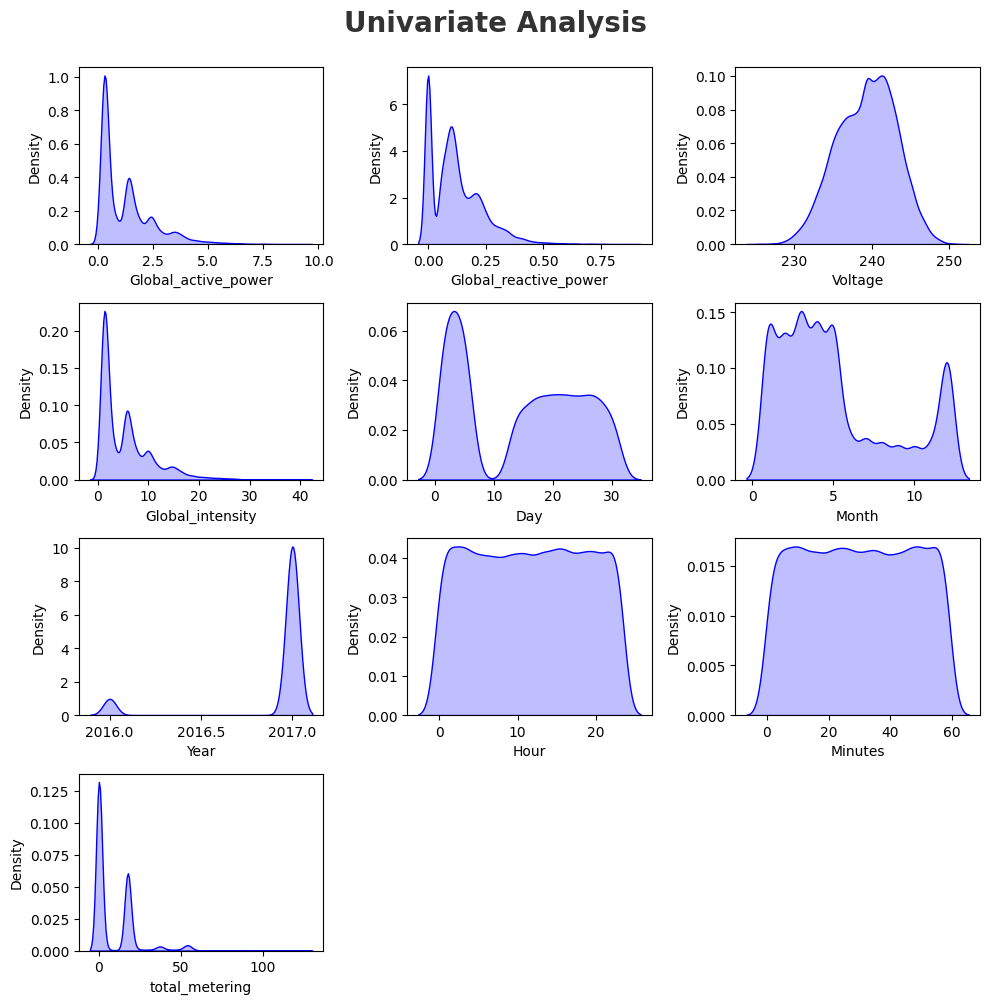

In [184]:
plt.figure(figsize=(10, 10))
plt.suptitle('Univariate Analysis', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(df.columns)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(x=df[df.columns[i]],shade=True, color='b')
    plt.xlabel(df.columns[i])
    plt.tight_layout()

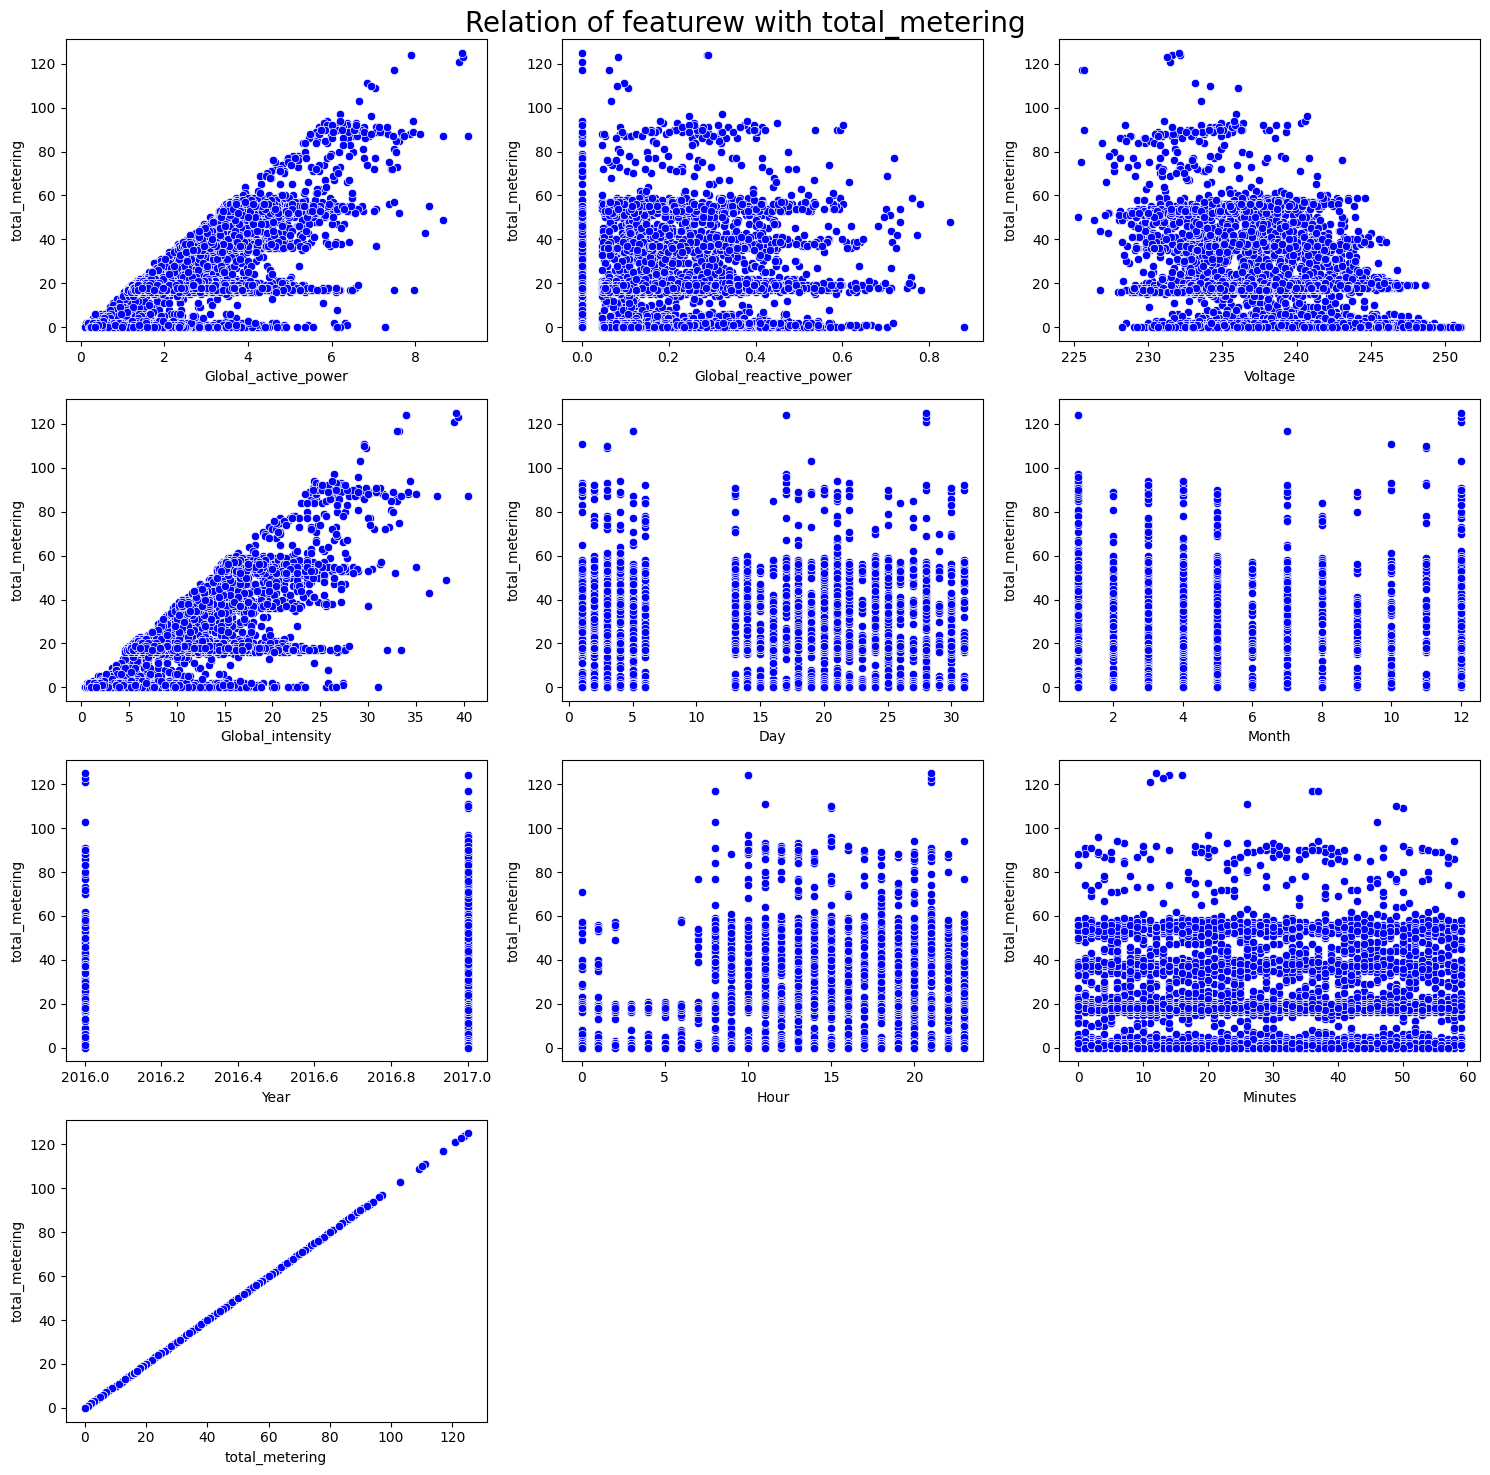

In [183]:
plt.figure(figsize=(15,15))
plt.suptitle('Relation of featurew with total_metering', fontsize = 20)

for i in range(0, len(df.columns)):
    plt.subplot(4, 3, i+1)
    sns.scatterplot(data = df, x = df[df.columns[i]], y = df['total_metering'], color = 'b')
    plt.xlabel(df.columns[i])
    plt.tight_layout()

<AxesSubplot:xlabel='Global_active_power', ylabel='total_metering'>

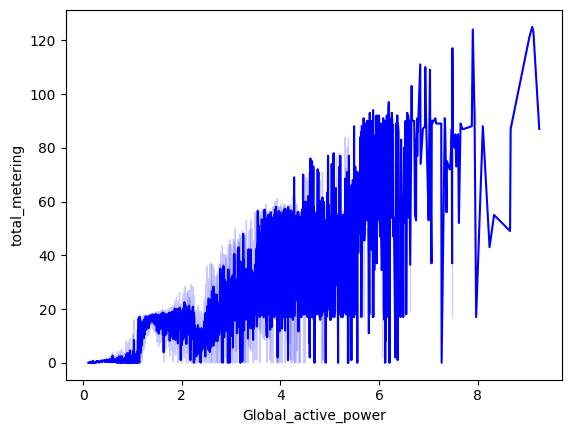

In [186]:
sns.lineplot(x = 'Global_active_power', y = 'total_metering', data = df, color = 'blue')

<AxesSubplot:xlabel='Global_reactive_power', ylabel='total_metering'>

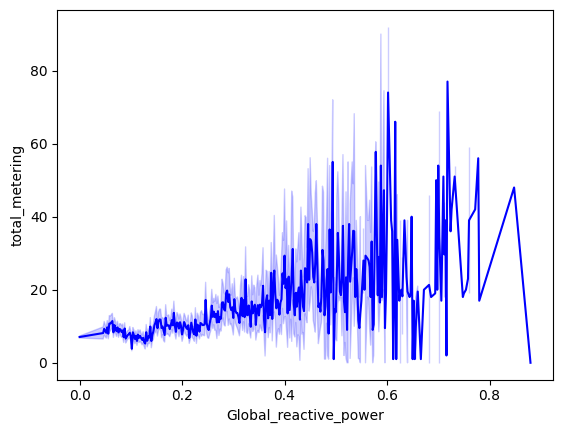

In [187]:
sns.lineplot(x = 'Global_reactive_power', y = 'total_metering', data = df, color = 'blue')

<AxesSubplot:xlabel='Voltage', ylabel='total_metering'>

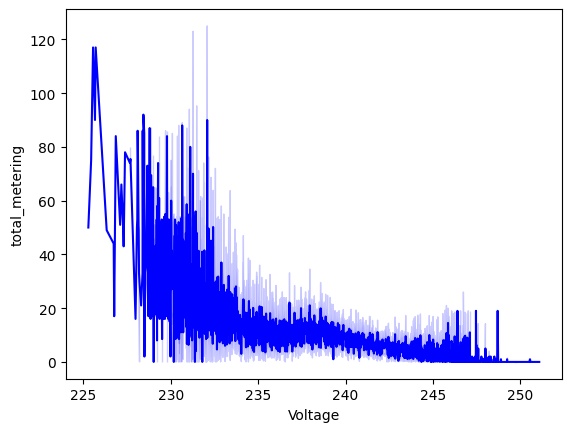

In [188]:
sns.lineplot(x = 'Voltage', y = 'total_metering', data = df, color = 'blue')

<AxesSubplot:xlabel='Global_intensity', ylabel='total_metering'>

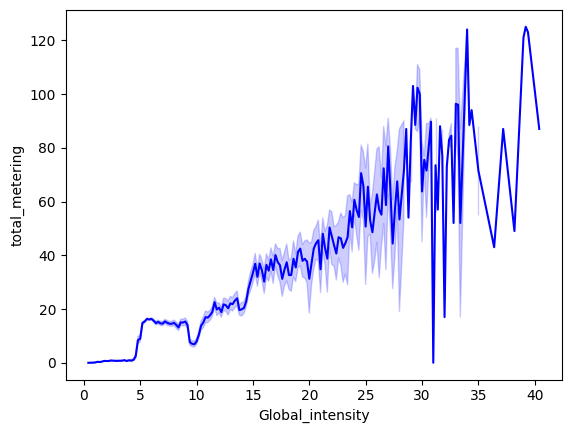

In [189]:
sns.lineplot(x = 'Global_intensity', y = 'total_metering', data = df, color = 'blue')

<AxesSubplot:xlabel='Day', ylabel='total_metering'>

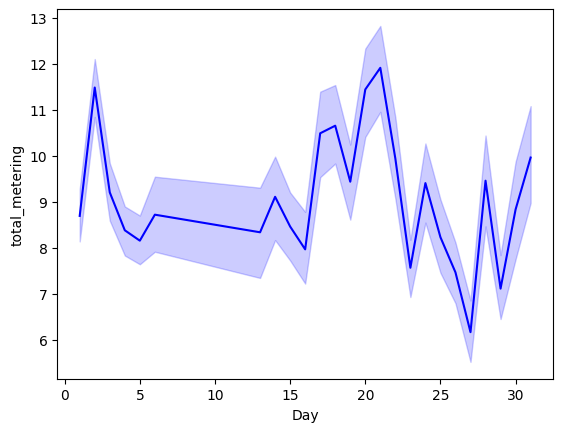

In [190]:
sns.lineplot(x = 'Day', y = 'total_metering', data = df, color = 'blue')

<AxesSubplot:xlabel='Month', ylabel='total_metering'>

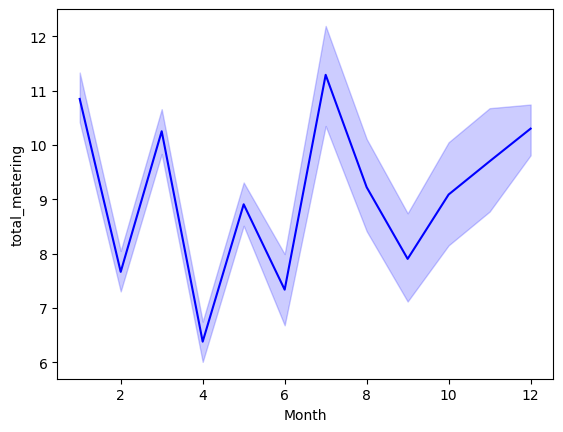

In [191]:
sns.lineplot(x = 'Month', y = 'total_metering', data = df, color = 'blue')

<AxesSubplot:xlabel='Year', ylabel='total_metering'>

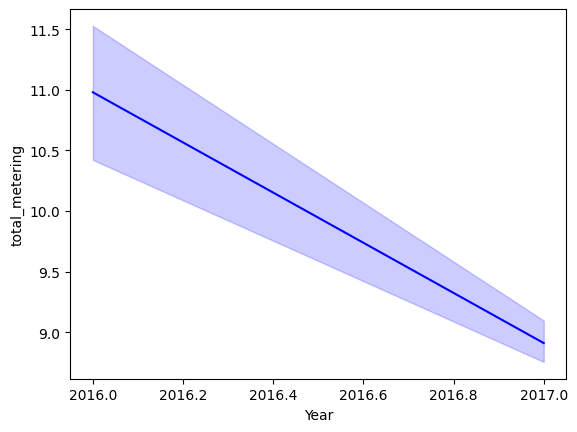

In [193]:
sns.lineplot(x = 'Year', y = 'total_metering', data = df, color = 'blue')

<AxesSubplot:xlabel='Hour', ylabel='total_metering'>

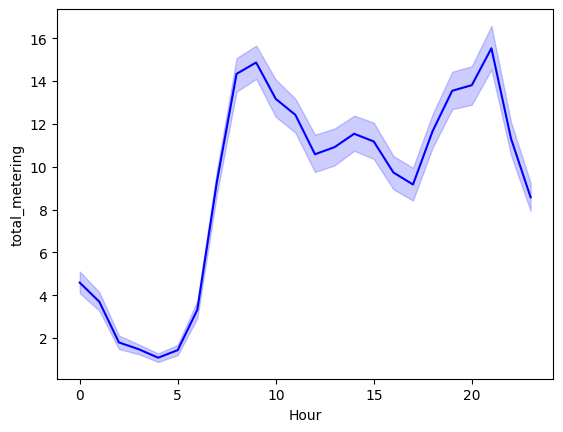

In [194]:
sns.lineplot(x = 'Hour', y = 'total_metering', data = df, color = 'blue')

<AxesSubplot:xlabel='Minutes', ylabel='total_metering'>

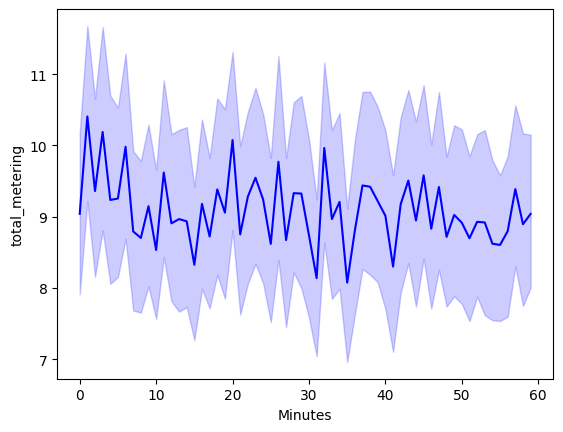

In [195]:
sns.lineplot(x = 'Minutes', y = 'total_metering', data = df, color = 'blue')

## Checking Correlation

In [196]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Day,Month,Year,Hour,Minutes,total_metering
Global_active_power,1.000000,0.272972,-0.344191,0.998993,0.022015,0.068773,-0.170171,0.284511,-0.004775,0.794159
Global_reactive_power,0.272972,1.000000,-0.099643,0.286980,-0.016245,0.034362,-0.041376,0.162951,-0.006660,0.199976
Voltage,-0.344191,-0.099643,1.000000,-0.355611,0.015925,0.017151,-0.168194,-0.202406,0.009144,-0.331404
Global_intensity,0.998993,0.286980,-0.355611,1.000000,0.021903,0.069108,-0.167596,0.285095,-0.005027,0.793838
Day,0.022015,-0.016245,0.015925,0.021903,1.000000,-0.200218,-0.291223,-0.001399,-0.005021,-0.014382
Month,0.068773,0.034362,0.017151,0.069108,-0.200218,1.000000,-0.606885,0.006418,-0.003842,0.012214
Year,-0.170171,-0.041376,-0.168194,-0.167596,-0.291223,-0.606885,1.000000,-0.008826,0.007340,-0.042620
Hour,0.284511,0.162951,-0.202406,0.285095,-0.001399,0.006418,-0.008826,1.000000,0.004045,0.232906
Minutes,-0.004775,-0.006660,0.009144,-0.005027,-0.005021,-0.003842,0.007340,0.004045,1.000000,-0.009210
total_metering,0.794159,0.199976,-0.331404,0.793838,-0.014382,0.012214,-0.042620,0.232906,-0.009210,1.000000


<AxesSubplot:>

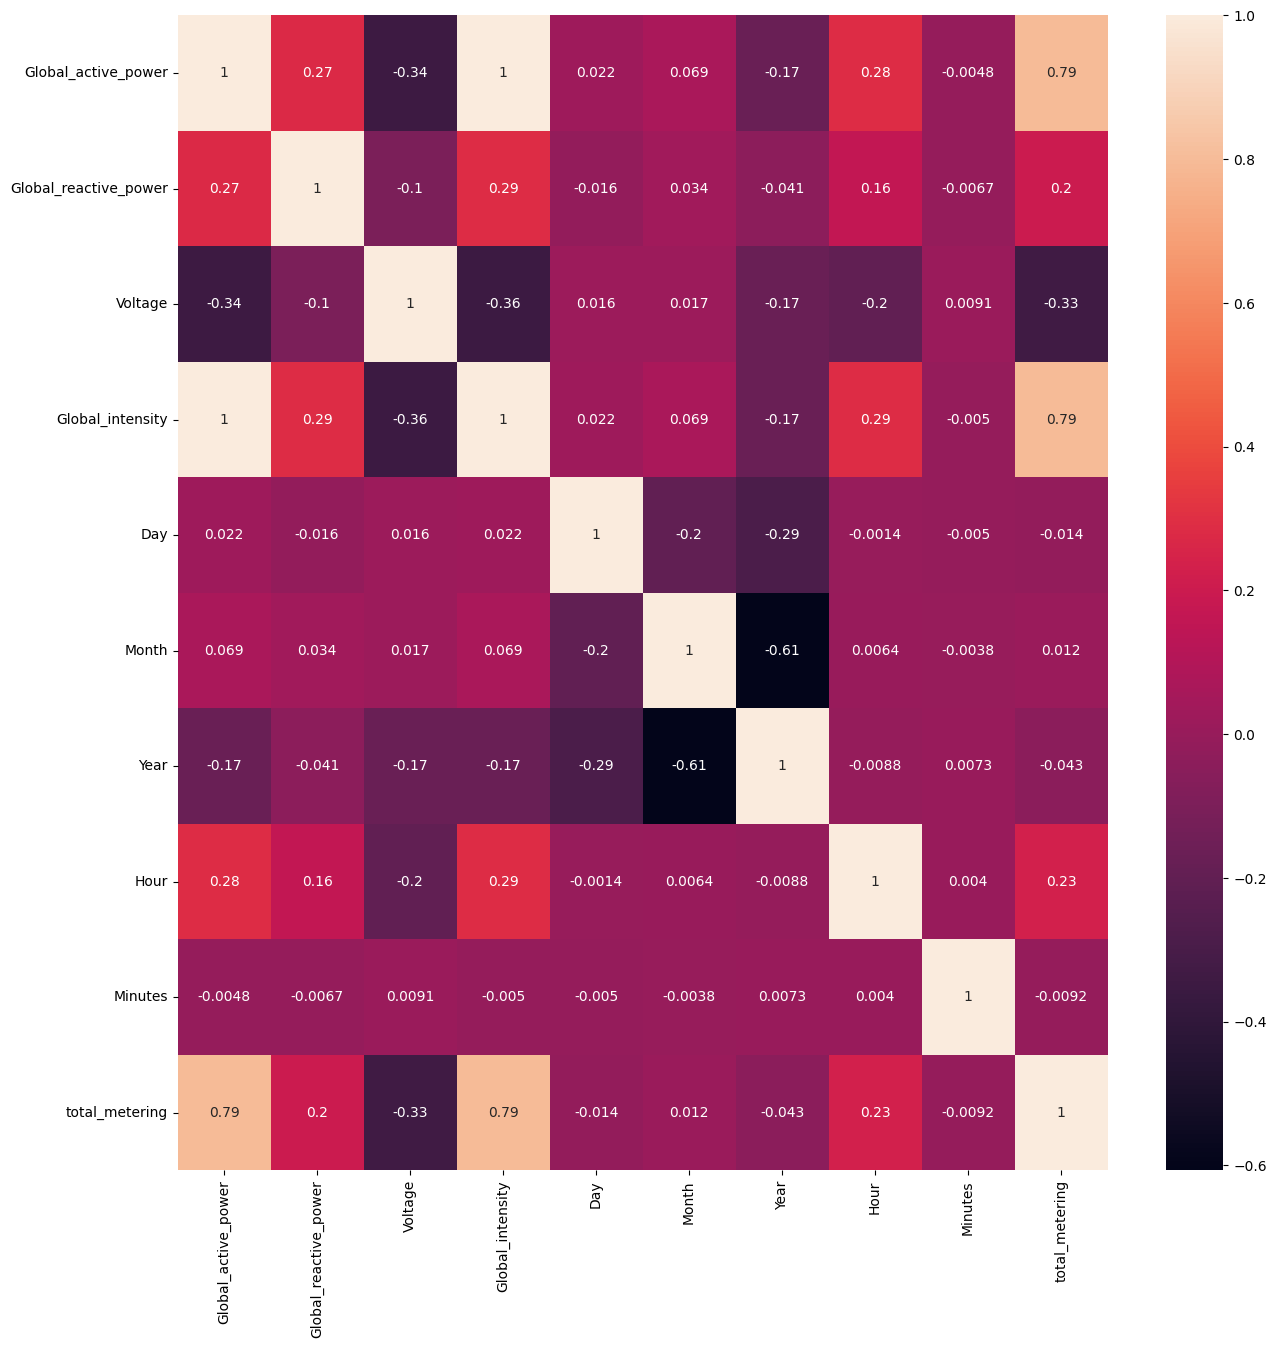

In [197]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df.corr(), annot=True)

**Observation**: Global_active_power and global_intensity are highly correlated.

### Handling multicollinearity 
with VIT (Variance Inflation Factor)

In [198]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
vif_data['Fetures'] = df.columns
vif_data

,VIF,Fetures
0,1254.515574,Global_active_power
1,2.706135,Global_reactive_power
2,5103.418335,Voltage
3,1282.205084,Global_intensity
4,3.284588,Day
5,3.225588,Month
6,5170.483692,Year
7,4.174028,Hour
8,3.902898,Minutes
9,3.969969,total_metering


- **'Global_active_power'**, **'Voltage'**, **'Global_intensity'**, and **'year'** has **VIF** value greater than **5**, that means these have **multicolinearity**. 
- Dropping **'Global_active_power'**as both **'global active power'** and **'global intensity'** is highly correlated, so keeping one is enough,
- although voltage's **VIF** is also high but will not drop it as it does not have **collinearity** that good with any other feature
- dropping **year** feature as high **VIF** value and also not having this will not affect model creation.

In [200]:
df.drop(columns=['Global_active_power', 'Year'], axis = 1, inplace = True)
df.head()

,Global_reactive_power,Voltage,Global_intensity,Day,Month,Hour,Minutes,total_metering
164525,0.348,241.69,2.4,4,9,23,29,2.0
67797,0.000,236.32,12.0,2,1,19,21,17.0
137223,0.312,241.67,6.6,22,3,0,27,19.0
189838,0.000,235.77,1.2,27,4,13,22,0.0
50682,0.000,239.84,4.6,20,1,22,6,1.0


### Checking outliers

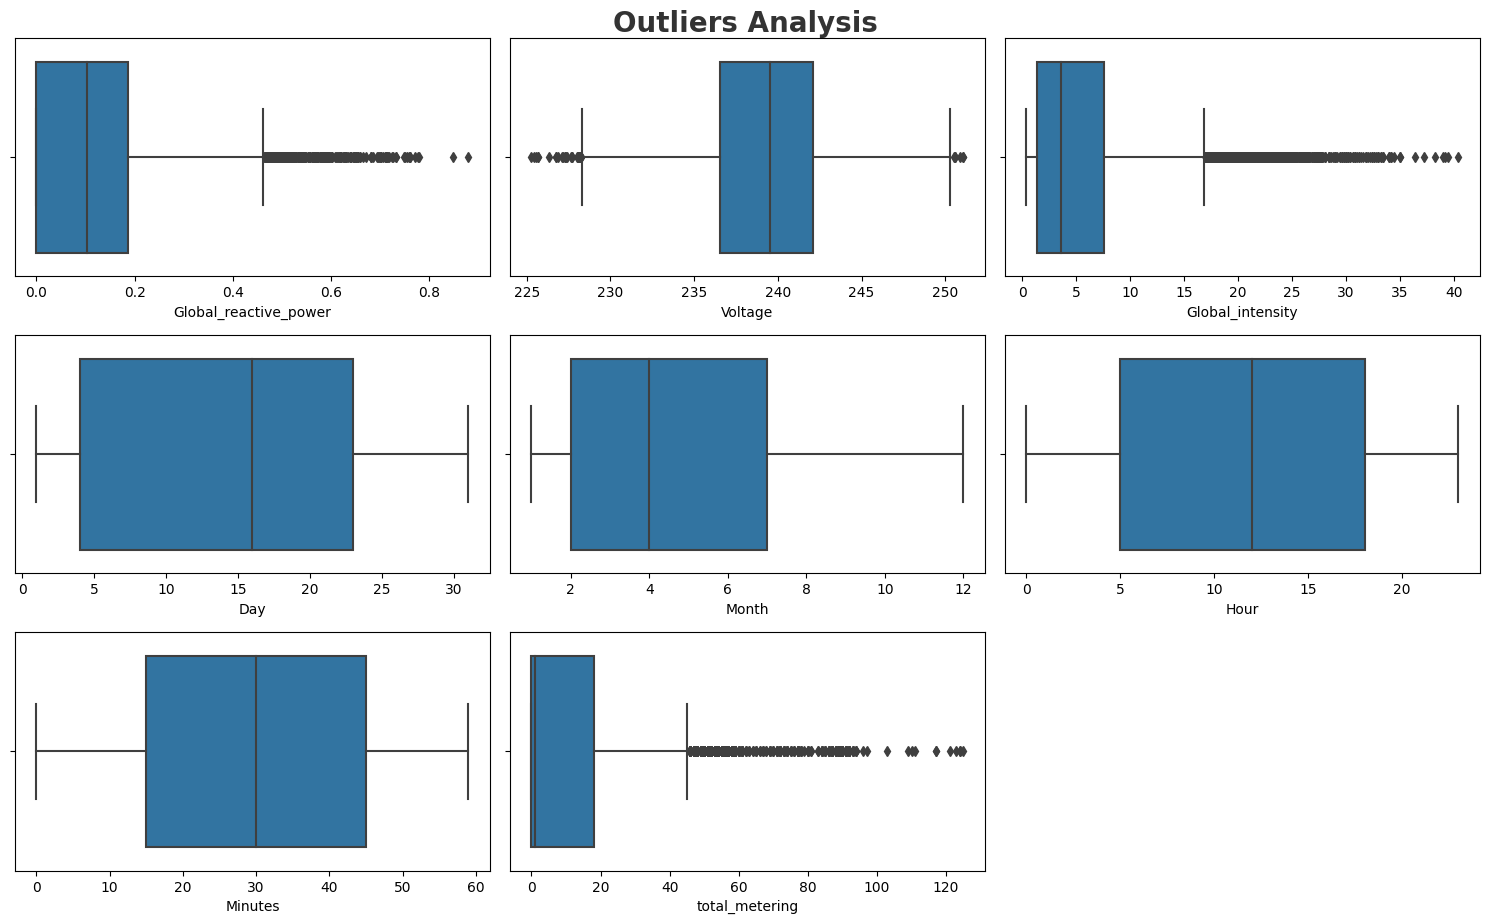

In [211]:
plt.figure(figsize=(15,15))
plt.suptitle("Outliers Analysis", fontsize = 20, fontweight = 'bold', alpha= 0.8)

for i in range(0, len(df.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(df[df.columns[i]])
    plt.tight_layout()

### importing winsorizer to handle outliers

In [206]:
from feature_engine.outliers.winsorizer import Winsorizer

In [215]:
winsorizer = Winsorizer(capping_method = 'iqr', #choose skewed for IQR rule
                       tail = 'both', #cap left, right or both tail 
                       fold = 1.5, #1.5 times of iqr
                       variables = ['Global_reactive_power'])

#capping_methods = 'iqr' - 25th quantile & 75th quantile
df['Global_reactive_power'] = winsorizer.fit_transform(df[['Global_reactive_power']])

In [216]:
df['Global_reactive_power'].describe()

count    30000.000000
mean         0.120027
std          0.107489
min          0.000000
25%          0.000000
50%          0.102000
75%          0.186000
max          0.465000
Name: Global_reactive_power, dtype: float64

In [219]:
winsorizer = Winsorizer(capping_method = 'iqr', #choose skewed for IQR rule
                       tail = 'both', #cap left, right or both tail 
                       fold = 1.5, #1.5 times of iqr
                       variables = ['Voltage'])

#capping_methods = 'iqr' - 25th quantile & 75th quantile
df['Voltage'] = winsorizer.fit_transform(df[['Voltage']])

In [221]:
df['Voltage'].describe()

count    30000.000000
mean       239.298552
std          3.774581
min        228.245000
25%        236.540000
50%        239.520000
75%        242.070000
max        250.365000
Name: Voltage, dtype: float64

In [223]:
winsorizer = Winsorizer(capping_method = 'iqr', #choose skewed for IQR rule
                       tail = 'both', #cap left, right or both tail 
                       fold = 1.5, #1.5 times of iqr
                       variables = ['Global_intensity'])

#capping_methods = 'iqr' - 25th quantile & 75th quantile
df['Global_intensity'] = winsorizer.fit_transform(df[['Global_intensity']])

In [226]:
winsorizer = Winsorizer(capping_method = 'iqr', #choose skewed for IQR rule
                       tail = 'both', #cap left, right or both tail 
                       fold = 1.5, #1.5 times of iqr
                       variables = ['total_metering'])

#capping_methods = 'iqr' - 25th quantile & 75th quantile
df['total_metering'] = winsorizer.fit_transform(df[['total_metering']])

In [227]:
df['total_metering'].describe()

count    30000.000000
mean         8.605633
std         11.919006
min          0.000000
25%          0.000000
50%          1.000000
75%         18.000000
max         45.000000
Name: total_metering, dtype: float64

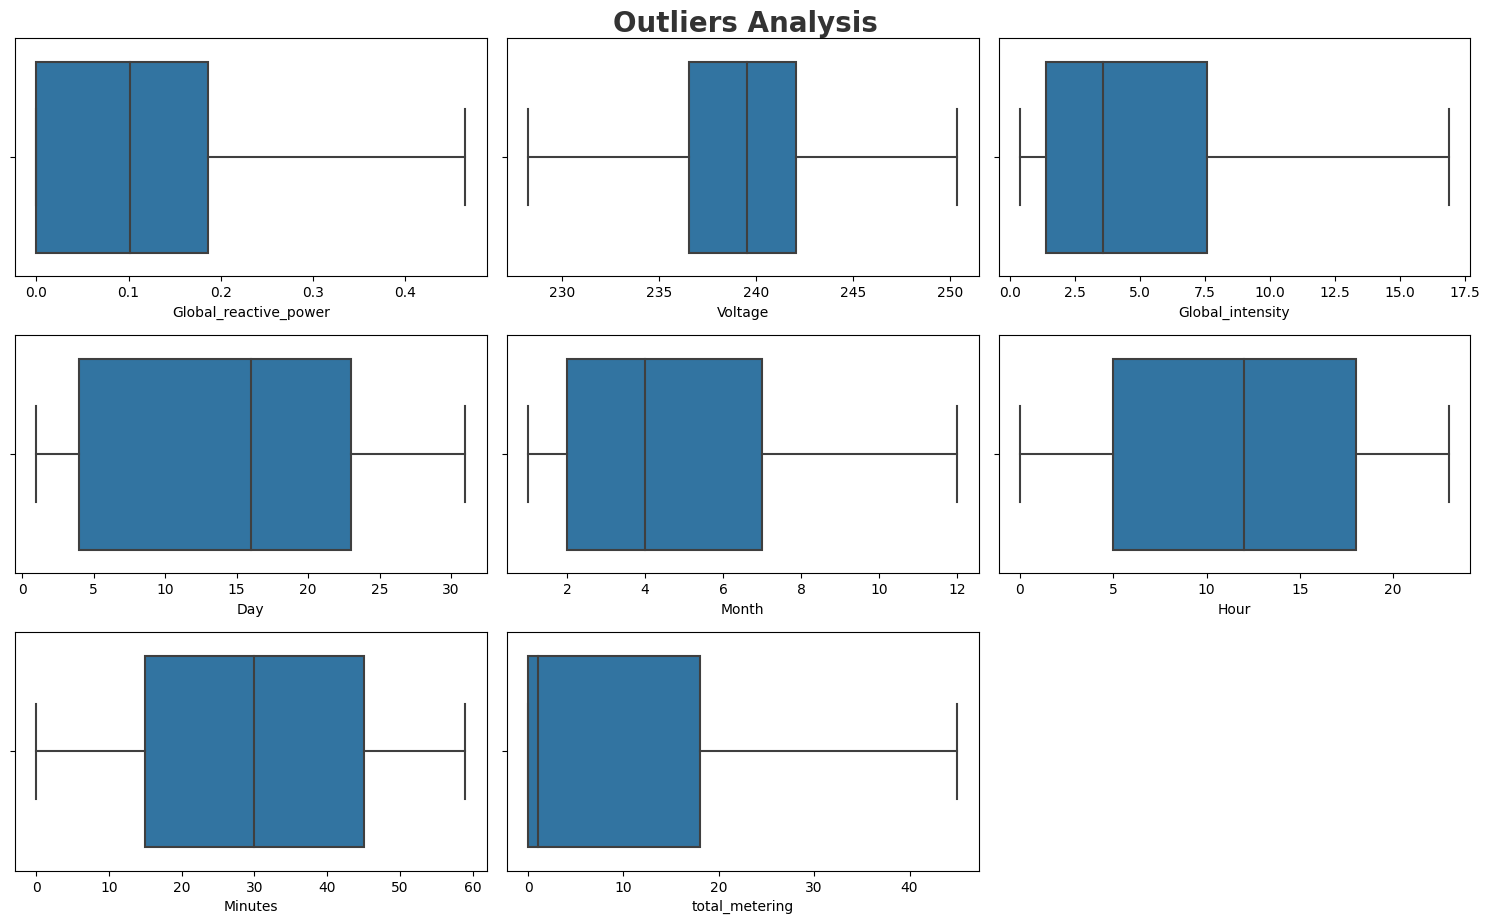

In [228]:
plt.figure(figsize=(15,15))
plt.suptitle("Outliers Analysis", fontsize = 20, fontweight = 'bold', alpha= 0.8)

for i in range(0, len(df.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(df[df.columns[i]])
    plt.tight_layout()

### Saving the cleaned data

In [231]:
df.to_csv('power_consumption_cleaned.csv')